# Jupyter du traitement du signal

## Bibliothèques

In [1]:
import numpy as np
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import hilbert
from scipy.ndimage import gaussian_filter1d

# Filtrage gaussien

## Exemple de filtrage gaussien

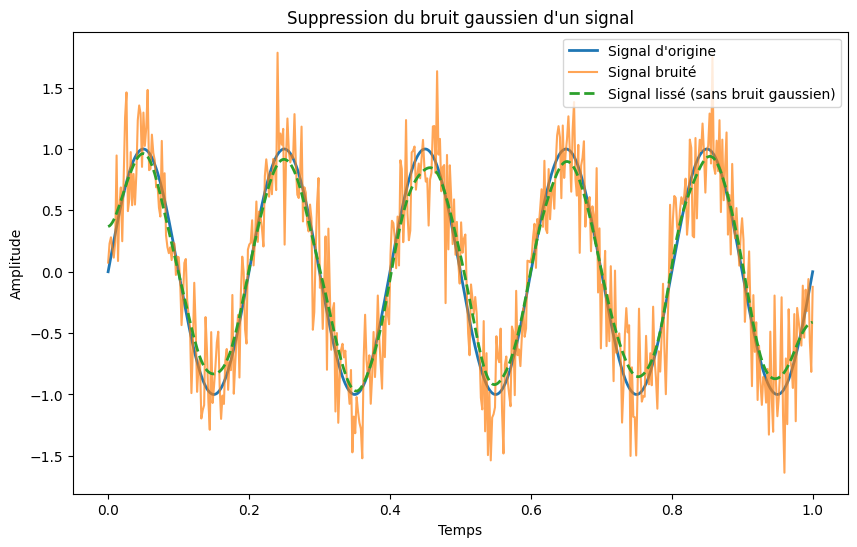

In [2]:
# Générer un signal avec du bruit gaussien
t = np.linspace(0, 1, 500)
signal = np.sin(2 * np.pi * 5 * t)

# Ajouter du bruit gaussien
noisy_signal = signal + 0.3 * np.random.normal(size=len(t))

# Appliquer un filtre gaussien pour supprimer le bruit
smoothed_signal = gaussian_filter1d(noisy_signal, sigma=7)
# Tracer les signaux
plt.figure(figsize=(10, 6))
plt.plot(t, signal, label='Signal d\'origine', linewidth=2)
plt.plot(t, noisy_signal, label='Signal bruité', alpha=0.7)
plt.plot(t, smoothed_signal, label='Signal lissé (sans bruit gaussien)', linestyle='--', linewidth=2)
plt.legend()
plt.title('Suppression du bruit gaussien d\'un signal')
plt.xlabel('Temps')
plt.ylabel('Amplitude')
plt.show()

## Application data VARIAN 634

On va appliquer un filtre gaussien à la tension pour borne d'une photodiode 

In [8]:
CHEMIN="C:\\Users\\admin\\Documents\\Projet_GP\\Programmation_Spectro\\Programmation_application_spectro\\Manip\\Manip_2023\\Manip_06_2023\\28_06_2023\\Fente_0_5nm"

fichier_blanc=  CHEMIN + '\\'+ "Tension_de_blanc_28_06_2023_Fente_0_5nm.csv"
fichier_echantillon=  CHEMIN + '\\' + "Tension_de_echantillon_28_06_2023_Fente_0_5nm.csv"

data_solution_blanc = pd.read_csv(fichier_blanc, encoding='ISO-8859-1')
data_solution_echantillon= pd.read_csv(fichier_echantillon, encoding='ISO-8859-1')

# Obtenir les colonnes 

Longueur_donde = data_solution_echantillon['Longueur d\'onde (nm)']
# Tension de la solution de référence
ref_voltage = data_solution_blanc['Tension blanc (Volt)']
# Tension de la solution avec l'échantillon
sample_voltage= data_solution_echantillon['Tension échantillon (Volt)']

On applique le filtre gaussien à Tension_blanc

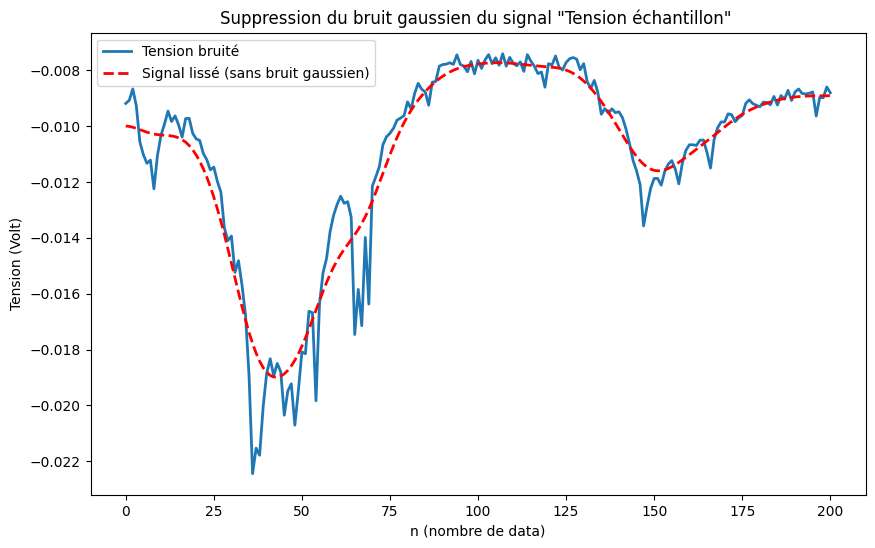

In [9]:
smoothed_signal = gaussian_filter1d(sample_voltage, sigma=6)
data_x = np.arange(0, len(sample_voltage),1)

# Tracer les signaux
plt.figure(figsize=(10, 6))
plt.plot(data_x, sample_voltage, label='Tension bruité', linewidth=2)
plt.plot(data_x, smoothed_signal, label='Signal lissé (sans bruit gaussien)', linestyle='--', linewidth=2, color='red')
plt.legend()
plt.title('Suppression du bruit gaussien du signal "Tension échantillon" ')
plt.xlabel('n (nombre de data)')
plt.ylabel('Tension (Volt)')
plt.show()

# Visualisation de l'absorbance

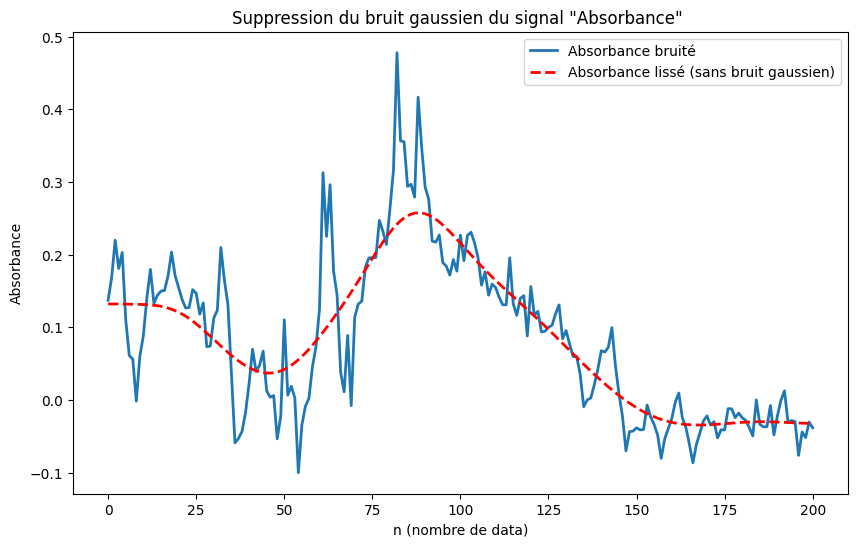

In [10]:

sigma=10
smoothed_signal_sample = gaussian_filter1d(sample_voltage, sigma)
smoothed_signal_ref = gaussian_filter1d(ref_voltage, sigma)


absorbance=np.log10(ref_voltage/sample_voltage)
absorbance_lisse=np.log10(smoothed_signal_ref/smoothed_signal_sample)

# Tracer les signaux
plt.figure(figsize=(10, 6))
plt.plot(data_x, absorbance, label='Absorbance bruité', linewidth=2)
plt.plot(data_x, absorbance_lisse, label='Absorbance lissé (sans bruit gaussien)', linestyle='--', linewidth=2, color='red')
plt.legend()
plt.title('Suppression du bruit gaussien du signal "Absorbance" ')
plt.xlabel('n (nombre de data)')
plt.ylabel('Absorbance')
plt.show()

## Produit de convolution avec une fonction porte (moyenne mobile)

# Exemple

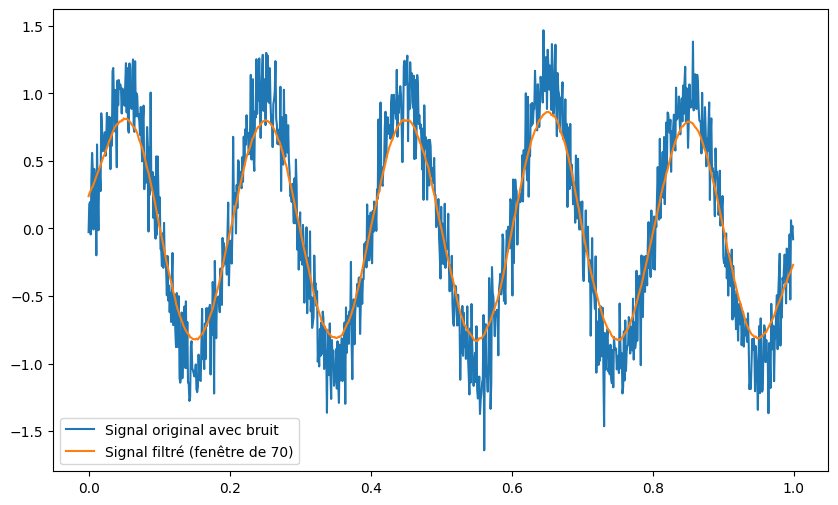

In [11]:
def apply_moving_average(signal, window_size):
    window = np.ones(window_size) / window_size
    smoothed_signal = np.convolve(signal, window, mode='same')
    return smoothed_signal

# Exemple de signal de tension avec du bruit
t = np.linspace(0, 1, 1000, endpoint=False)
signal = np.sin(2 * np.pi * 5 * t) + 0.2 * np.random.normal(size=len(t)) 

# Appliquer le filtre moyenneur
window_size = 70
smoothed_signal = apply_moving_average(signal, window_size)

# Tracer les résultats
plt.figure(figsize=(10, 6))
plt.plot(t, signal, label='Signal original avec bruit')
plt.plot(t, smoothed_signal, label=f'Signal filtré (fenêtre de {window_size})')
plt.legend()
plt.show()


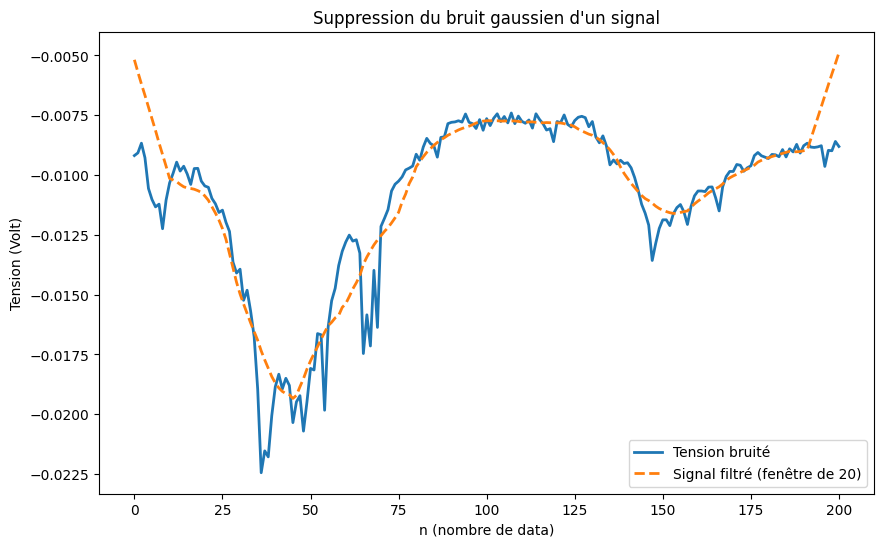

In [12]:

door_function_width=20
voltage_convol=apply_moving_average(sample_voltage,door_function_width)

# Tracer les signaux
plt.figure(figsize=(10, 6))
plt.plot(data_x, sample_voltage, label='Tension bruité', linewidth=2)
plt.plot(data_x, voltage_convol, label=f'Signal filtré (fenêtre de {door_function_width})', linestyle='--', linewidth=2)
plt.legend()
plt.title('Suppression du bruit gaussien d\'un signal')
plt.xlabel('n (nombre de data)')
plt.ylabel('Tension (Volt)')
plt.show()


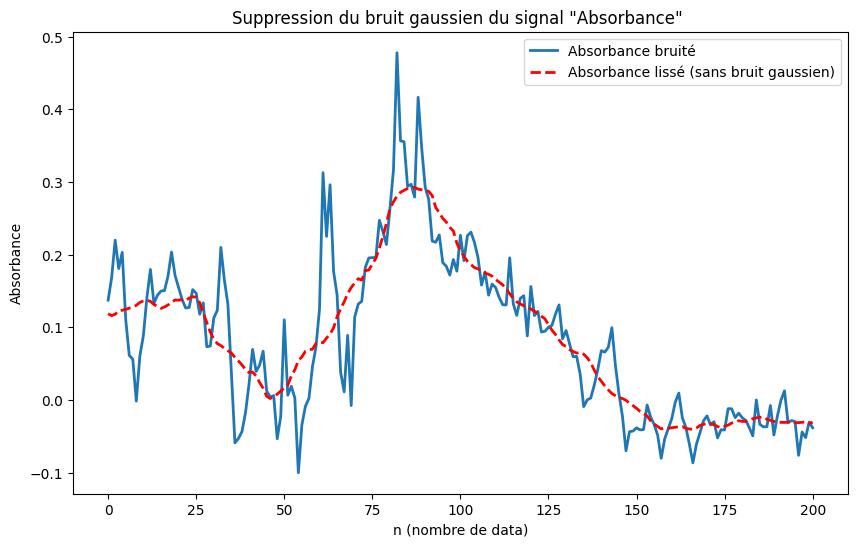

In [13]:
door_function_width=20
convol_signal_sample = apply_moving_average(sample_voltage, door_function_width)
convol_signal_ref = apply_moving_average(ref_voltage, door_function_width)


absorbance_lisse_convolu=np.log10(convol_signal_ref/convol_signal_sample)


# Tracer les signaux
plt.figure(figsize=(10, 6))
plt.plot(data_x, absorbance, label='Absorbance bruité', linewidth=2)
plt.plot(data_x, absorbance_lisse_convolu, label='Absorbance lissé (sans bruit gaussien)', linestyle='--', linewidth=2, color='red')
plt.legend()
plt.title('Suppression du bruit gaussien du signal "Absorbance" ')
plt.xlabel('n (nombre de data)')
plt.ylabel('Absorbance')
plt.show()